# Bank Marketing Classfication

The dataset provided is related to direct marketing campaigns conducted by a Portuguese banking institution. we must predict whether a client will subscribe to a term deposit based on various attributes.The model should be trained to accurately predict whether a client will subscribe to a term deposit, contributing to the bank's marketing campaign strategies.

#### Importing The Libraries & Loading The Data

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [71]:
dfTrain=pd.read_csv("/content/trainCV1.csv")
dfTest=pd.read_csv("/content/testCV1.csv")

#### Data Review

In [ ]:
dfTrain.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,3,999,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no
1,29,technician,single,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
2,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
3,34,services,married,university.degree,no,no,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
4,32,admin.,single,high.school,no,no,no,cellular,may,fri,...,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


In [ ]:
dfTrain.shape

(28831, 21)

In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  duration        28831 non-null  int64  
 11  campaign        28831 non-null  int64  
 12  pdays           28831 non-null  int64  
 13  previous        28831 non-null  int64  
 14  poutcome        28831 non-null  object 
 15  emp.var.rate    28831 non-null  float64
 16  cons.price.idx  28831 non-null  float64
 17  cons.conf.idx   28831 non-null 

In [ ]:
dfTrain.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
dfTrain.nunique()

age                 77
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1432
campaign            40
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          312
nr.employed         11
y                    2
dtype: int64

In [ ]:
for col in dfTrain.columns:
    unique_vals = dfTrain[col].unique()
    print(col)
    print(unique_vals)

age
[29 45 34 32 46 37 38 41 53 27 36 28 51 35 63 49 40 50 24 43 30 31 33 60
 39 44 47 42 25 48 58 26 52 23 55 54 62 59 56 71 57 75 21 76 18 61 22 88
 69 70 66 73 19 80 91 64 20 65 72 68 82 78 67 83 77 81 98 79 85 84 74 92
 95 89 17 86 87]
job
['admin.' 'technician' 'blue-collar' 'services' 'entrepreneur'
 'unemployed' 'housemaid' 'management' 'unknown' 'self-employed' 'retired'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['university.degree' 'basic.6y' 'high.school' 'basic.4y'
 'professional.course' 'basic.9y' 'unknown' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['cellular' 'telephone']
month
['dec' 'may' 'nov' 'jul' 'jun' 'mar' 'aug' 'oct' 'apr' 'sep']
day_of_week
['mon' 'fri' 'thu' 'tue' 'wed']
duration
[  77   12  277 ... 1263 1973 1141]
campaign
[ 3  4  2  1  9  5  6 12  7  8 10 11 19 15 13 14 17 18 25 32 21 16 40 24
 27 22 23 35 20 43 26 29 33 31 28 34 30 41 39 37]
pdays
[999   6   7 

In [141]:
dfTest.shape

(12357, 58)

There are some columns have 'unknown' which means Null so We've to handle it.

#### Handling Nulls

In [72]:
col_names = dfTrain.columns
num_data = dfTrain.shape[0]
for c in col_names:
    num_non = dfTrain[c].isin(["unknown"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

job
236
0.82%


marital
52
0.18%


education
1236
4.29%


default
5980
20.74%


housing
714
2.48%


loan
714
2.48%




In [73]:
dfTrain.loc[dfTrain['job'] == "unknown", 'job' ] = dfTrain['job'].mode()[0]
dfTrain.loc[dfTrain['marital'] == "unknown", 'marital' ] = dfTrain['marital'].mode()[0]
dfTrain.loc[dfTrain['education'] == "unknown", 'education' ] = dfTrain['education'].mode()[0]
dfTrain.loc[dfTrain['default'] == "unknown", 'default' ] = dfTrain['default'].mode()[0]
dfTrain.loc[dfTrain['housing'] == 'unknown', 'housing' ] = dfTrain['housing'].mode()[0]
dfTrain.loc[dfTrain['loan'] == 'unknown', 'loan' ] = dfTrain['loan'].mode()[0]

In [74]:
dfTrain['job'].unique()

array(['admin.', 'technician', 'blue-collar', 'services', 'entrepreneur',
       'unemployed', 'housemaid', 'management', 'self-employed',
       'retired', 'student'], dtype=object)

In [75]:
dfTrain['housing'].unique()

array(['no', 'yes'], dtype=object)

In [76]:
dfTrain['loan'].unique()

array(['no', 'yes'], dtype=object)

In [77]:
col_names = dfTest.columns
num_data = dfTest.shape[0]
for c in col_names:
    num_non = dfTest[c].isin(["unknown"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

job
94
0.76%


marital
28
0.23%


education
495
4.01%


default
2617
21.18%


housing
276
2.23%


loan
276
2.23%




In [78]:
dfTest.loc[dfTest['job'] == "unknown", 'job' ] = dfTest['job'].mode()[0]
dfTest.loc[dfTest['marital'] == "unknown", 'marital' ] = dfTest['marital'].mode()[0]
dfTest.loc[dfTest['education'] == "unknown", 'education' ] = dfTest['education'].mode()[0]
dfTest.loc[dfTest['default'] == "unknown", 'default' ] = dfTest['default'].mode()[0]
dfTest.loc[dfTest['housing'] == 'unknown', 'housing' ] =dfTest['housing'].mode()[0]
dfTest.loc[dfTest['loan'] == 'unknown', 'loan' ] = dfTest['loan'].mode()[0]

In [79]:
dfTest['loan'].unique()

array(['yes', 'no'], dtype=object)

#### Encoding and Scaling

In [80]:
numeric_columns = dfTrain.select_dtypes(include=['int64', 'float64'])
numeric_columns.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [81]:
numeric_columns.shape

(28831, 10)

In [82]:
object_columns = dfTrain.select_dtypes(include=['object'])
object_columns.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [83]:
object_columns.shape

(28831, 11)

In [84]:
target_col = 'y'  # Replace with the actual name of your target column

# Get a list of columns to one-hot encode (excluding the target column)
columns_to_encode = [col for col in dfTrain.columns if col != target_col and dfTrain[col].dtype == 'object']

# Perform one-hot encoding for the selected columns
dfTrain = pd.get_dummies(dfTrain, columns=columns_to_encode, prefix=columns_to_encode)

In [85]:
dfTrain.shape

(28831, 58)

In [86]:
dfTrain.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,29,77,3,999,1,-3.0,92.713,-33.0,0.709,5023.5,...,0,0,0,1,0,0,0,1,0,0
1,29,12,4,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,0,1,0,0,0,0,0,1,0
2,45,277,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
3,34,70,1,999,1,-1.8,92.893,-46.2,1.327,5099.1,...,0,0,0,0,1,0,0,1,0,0
4,32,1181,9,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,0,1,0,0,0,0,0,1,0


In [87]:
dfTrain['y']

0         no
1         no
2         no
3         no
4         no
        ... 
28826     no
28827     no
28828    yes
28829     no
28830     no
Name: y, Length: 28831, dtype: object

In [88]:
dfTrain['y']=dfTrain['y'].replace("yes",1)
dfTrain['y']=dfTrain['y'].replace("no",0)

In [89]:
dfTrain['y']

0        0
1        0
2        0
3        0
4        0
        ..
28826    0
28827    0
28828    1
28829    0
28830    0
Name: y, Length: 28831, dtype: int64

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the data and transform the numeric columns in-place
dfTrain[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

In [91]:
dfTrain.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.148148,0.015657,0.047619,1.0,0.142857,0.083333,0.199532,0.744770,0.017003,0.226465,...,0,0,0,1,0,0,0,1,0,0
1,0.148148,0.002440,0.071429,1.0,0.000000,0.333333,0.269680,0.192469,0.139651,0.512287,...,0,0,1,0,0,0,0,0,1,0
2,0.345679,0.056324,0.023810,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,...,0,0,0,0,1,0,0,0,1,0
3,0.209877,0.014233,0.000000,1.0,0.142857,0.333333,0.269680,0.192469,0.157107,0.512287,...,0,0,0,0,1,0,0,1,0,0
4,0.185185,0.240138,0.190476,1.0,0.000000,0.333333,0.269680,0.192469,0.139651,0.512287,...,0,0,1,0,0,0,0,0,1,0


In [93]:
object_columns = dfTest.select_dtypes(include=['object'])
object_columns.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [94]:
columns_to_encode = [col for col in dfTest.columns if dfTest[col].dtype == 'object']

# Perform one-hot encoding for the selected columns
dfTest = pd.get_dummies(dfTest, columns=columns_to_encode, prefix=columns_to_encode)

In [96]:
dfTest.columns

Index(['ID', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'da

In [97]:
excluded_column = 'ID'  # Replace with the actual name of the excluded column

# Extract numeric columns (excluding the excluded column)
numeric_columns = dfTest.select_dtypes(include=['int64', 'float64']).drop(columns=[excluded_column])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfTest[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

In [98]:
dfTest.head()

,ID,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0.519481,0.105473,0.000000,1.0,0.166667,0.333333,0.269680,0.192469,0.150759,...,0,0,0,1,0,0,0,1,0,0
1,1,0.493506,0.080958,0.018182,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,...,0,0,0,0,1,0,0,0,1,0
2,2,0.207792,0.014538,0.000000,1.0,0.166667,0.333333,0.269680,0.192469,0.153933,...,0,0,1,0,0,0,0,1,0,0
3,3,0.246753,0.100912,0.054545,1.0,0.000000,1.000000,0.882307,0.376569,0.982317,...,0,0,1,0,0,0,0,0,1,0
4,4,0.129870,0.053592,0.018182,1.0,0.000000,1.000000,0.669135,0.338912,0.981410,...,0,0,1,0,0,0,0,0,1,0


#### Preparing The Data

In [38]:
X=dfTrain.drop('y',axis=1)
y=dfTrain['y']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

In [40]:
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

The number of training samples: 23064
The number of testing samples: 5767


#### Creating, Compiling and Training a Model

In [57]:
# Creating a model

# Getting the input shape

input_shape = X_train.shape[1:]

model_1 = tf.keras.models.Sequential([

              # The first layer has 30 neurons(or units)
              tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),

              # The second layer has 25 neurons
               tf.keras.layers.Dense(units=15, activation='relu'),

              # The third layer has 1 neuron and activation of sigmoid.
              # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1
              tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model

model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics='accuracy')


In [58]:
history = model_1.fit(X_train, y_train, epochs=60, validation_split=0.15)

Epoch 1/60
613/613 [==============================] - 2s 2ms/step - loss: 0.3345 - accuracy: 0.8871 - val_loss: 0.3121 - val_accuracy: 0.8853
Epoch 2/60
613/613 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 0.8879 - val_loss: 0.2954 - val_accuracy: 0.8855
Epoch 3/60
613/613 [==============================] - 1s 2ms/step - loss: 0.2940 - accuracy: 0.8917 - val_loss: 0.2859 - val_accuracy: 0.8882
Epoch 4/60
613/613 [==============================] - 1s 2ms/step - loss: 0.2886 - accuracy: 0.8943 - val_loss: 0.2805 - val_accuracy: 0.8939
Epoch 5/60
613/613 [==============================] - 1s 2ms/step - loss: 0.2850 - accuracy: 0.8963 - val_loss: 0.2768 - val_accuracy: 0.8980
Epoch 6/60
613/613 [==============================] - 1s 2ms/step - loss: 0.2821 - accuracy: 0.8968 - val_loss: 0.2742 - val_accuracy: 0.8991
Epoch 7/60
613/613 [==============================] - 1s 2ms/step - loss: 0.2798 - accuracy: 0.8975 - val_loss: 0.2722 - val_accuracy: 0.9003
Epoch 

In [59]:
model_eval = model_1.evaluate(X_test, y_test)

# Printing the loss and accuracy

print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

181/181 [==============================] - 0s 1ms/step - loss: 0.1973 - accuracy: 0.9081
Test loss: 0.19727519154548645
Test accuracy:0.9080978035926819


In [100]:
dfTest

,ID,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0.519481,0.105473,0.000000,1.000000,0.166667,0.333333,0.269680,0.192469,0.150759,...,0,0,0,1,0,0,0,1,0,0
1,1,0.493506,0.080958,0.018182,1.000000,0.000000,0.937500,0.698753,0.602510,0.958059,...,0,0,0,0,1,0,0,0,1,0
2,2,0.207792,0.014538,0.000000,1.000000,0.166667,0.333333,0.269680,0.192469,0.153933,...,0,0,1,0,0,0,0,1,0,0
3,3,0.246753,0.100912,0.054545,1.000000,0.000000,1.000000,0.882307,0.376569,0.982317,...,0,0,1,0,0,0,0,0,1,0
4,4,0.129870,0.053592,0.018182,1.000000,0.000000,1.000000,0.669135,0.338912,0.981410,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,12352,0.376623,0.051311,0.018182,1.000000,0.000000,1.000000,0.669135,0.338912,0.980730,...,0,0,0,1,0,0,0,0,1,0
12353,12353,0.272727,0.176454,0.000000,0.002002,0.166667,0.333333,0.340608,0.154812,0.185672,...,0,0,0,0,0,1,0,0,0,1
12354,12354,0.116883,0.071266,0.018182,1.000000,0.000000,1.000000,0.669135,0.338912,0.981183,...,0,0,0,1,0,0,0,0,1,0
12355,12355,0.441558,0.013968,0.036364,1.000000,0.000000,1.000000,0.484412,0.615063,0.982090,...,0,0,1,0,0,0,0,0,1,0


In [60]:
predictions = model_1.predict(X_test)

181/181 [==============================] - 0s 1ms/step


In [47]:
predictions[:15]

array([[0.1117835 ],
       [0.00885199],
       [0.03450583],
       [0.00450464],
       [0.26354542],
       [0.00369042],
       [0.00604871],
       [0.01776838],
       [0.00154727],
       [0.00094944],
       [0.00638058],
       [0.01145782],
       [0.04591025],
       [0.05029122],
       [0.00499979]], dtype=float32)

In [48]:
predictions = tf.round(predictions)

In [49]:
predictions[:15]

<tf.Tensor: shape=(15, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

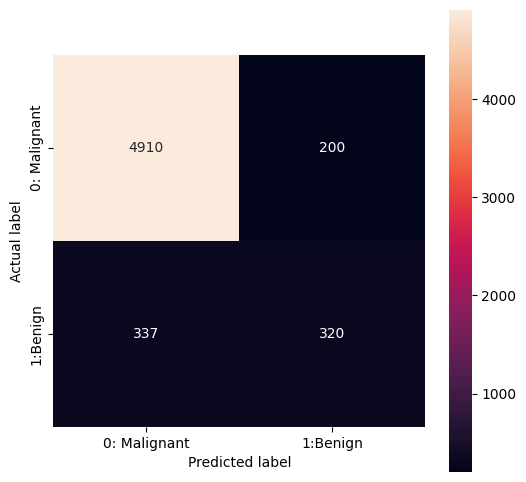

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

# Plotting confusion matrix

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: Malignant', '1:Benign'],
                        yticklabels=['0: Malignant', '1:Benign'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5110
           1       0.62      0.49      0.54       657

    accuracy                           0.91      5767
   macro avg       0.78      0.72      0.75      5767
weighted avg       0.90      0.91      0.90      5767



In [70]:
dfTest.head()

,ID,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.000000,0.519481,0.105473,0.000000,1.0,0.166667,0.333333,0.269680,0.192469,0.150759,...,0,0,0,1,0,0,0,1,0,0
1,0.000081,0.493506,0.080958,0.018182,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,...,0,0,0,0,1,0,0,0,1,0
2,0.000162,0.207792,0.014538,0.000000,1.0,0.166667,0.333333,0.269680,0.192469,0.153933,...,0,0,1,0,0,0,0,1,0,0
3,0.000243,0.246753,0.100912,0.054545,1.0,0.000000,1.000000,0.882307,0.376569,0.982317,...,0,0,1,0,0,0,0,0,1,0
4,0.000324,0.129870,0.053592,0.018182,1.0,0.000000,1.000000,0.669135,0.338912,0.981410,...,0,0,1,0,0,0,0,0,1,0


In [119]:
test_data_without_id = dfTest.drop(columns=['ID'])

# Make predictions on the preprocessed test data
y = model_1.predict(test_data_without_id)

387/387 [==============================] - 2s 4ms/step


In [120]:
y = tf.round(predictions)

In [121]:
y

<tf.Tensor: shape=(12357, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [122]:
np.unique(y)

array([0., 1.], dtype=float32)

In [123]:
result = pd.DataFrame(y)

In [126]:
result.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [128]:
result.rename(columns={ 0: 'y'}, inplace=True)

In [129]:
result.head()

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [130]:
result['y']=result['y'].replace(1,"yes")
result['y']=result['y'].replace(0,"no")

In [131]:
result.head()

,y
0,no
1,no
2,no
3,no
4,no


In [134]:
result['ID']=dfTest['ID']

In [135]:
result.head()

,y,ID
0,no,0
1,no,1
2,no,2
3,no,3
4,no,4


In [137]:
result = result[['ID', 'y']]

In [138]:
result.head()

,ID,y
0,0,no
1,1,no
2,2,no
3,3,no
4,4,no


In [139]:
result.to_csv('predictions.csv', index=False)